# Analysis and Classification of Attacks using Realistic Botnet Dataset

In [1]:
# Importing necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report



%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

**Connect with kaggle**

In [3]:
test = pd.read_csv('/kaggle/input/botnet-train-test/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv', delimiter= ',')
train = pd.read_csv('/kaggle/input/botnet-train-test/UNSW_2018_IoT_Botnet_Final_10_Best.csv', delimiter= ';')
data = pd.read_csv("/kaggle/input/unsq-2018-iot-botnet/UNSW_2018_IoT_Botnet_Final_10_Best.csv", delimiter= ';')

In [4]:
train.head()

,Unnamed: 0,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [5]:
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [6]:
data.head()

,Unnamed: 0,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [7]:
# General Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   pkSeqID            int64  
 2   proto              object 
 3   saddr              object 
 4   sport              object 
 5   daddr              object 
 6   dport              object 
 7   seq                int64  
 8   stddev             float64
 9   N_IN_Conn_P_SrcIP  int64  
 10  min                float64
 11  state_number       int64  
 12  mean               float64
 13  N_IN_Conn_P_DstIP  int64  
 14  drate              float64
 15  srate              float64
 16  max                float64
 17  attack             int64  
 18  category           object 
 19  subcategory        object 
dtypes: float64(6), int64(7), object(7)
memory usage: 559.8+ MB


## Exploratory Data Analysis

In [8]:
data.describe()

,Unnamed: 0,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834260e+06,1.834262e+06,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.059011e+06,1.059011e+06,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171302e+05,9.171312e+05,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,1.834260e+06,1.834262e+06,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,2.751391e+06,2.751392e+06,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,3.668521e+06,3.668522e+06,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [9]:
data["proto"].value_counts()

proto
udp          1996437
tcp          1662812
icmp            9052
arp              213
ipv6-icmp          8
Name: count, dtype: int64

In [10]:
data["saddr"].value_counts()

saddr
192.168.100.147              950966
192.168.100.148              923290
192.168.100.150              890262
192.168.100.149              890146
192.168.100.3                  8281
192.168.100.5                  5118
192.168.100.6                   327
192.168.100.7                    43
192.168.100.4                    19
192.168.100.1                    16
192.168.100.46                   15
192.168.100.27                   14
fe80::250:56ff:febe:254           6
fe80::c0c0:aa20:45b9:bdd9         4
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          2
fe80::250:56ff:febe:89ee          2
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:bf1a          2
fe80::250:56ff:febe:c038          2
Name: count, dtype: int64

In [11]:
data["sport"].value_counts()

sport
0x0303    8950
80        3985
2290      1045
2456      1043
2969      1041
          ... 
29490        4
29603        4
29602        4
29601        4
29550        4
Name: count, Length: 131078, dtype: int64

In [12]:
data["daddr"].value_counts()

daddr
192.168.100.3      2375733
192.168.100.5       451694
192.168.100.7       414859
192.168.100.6       412209
192.168.100.150       3860
                    ...   
205.251.195.185          1
205.251.199.61           1
205.251.199.194          1
205.251.198.119          1
205.251.194.154          1
Name: count, Length: 84, dtype: int64

In [13]:
data["dport"].value_counts()

dport
80       3010637
80        562938
1           6745
3306        4613
53           340
          ...   
8926           1
8923           1
8922           1
8917           1
30552          1
Name: count, Length: 7839, dtype: int64

In [14]:
data["category"].value_counts()

category
DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: count, dtype: int64

In [15]:
data["attack"].value_counts()

attack
1    3668045
0        477
Name: count, dtype: int64

In [16]:
train['attack'].value_counts()

attack
1    3668045
0        477
Name: count, dtype: int64

In [17]:
if "attack" in test.columns:
    print(test["attack"].value_counts())
else:
    print("Column 'attack' does not exist.")

attack
1    733598
0       107
Name: count, dtype: int64


In [18]:
data["subcategory"].value_counts()

subcategory
UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: count, dtype: int64

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data[data["attack"] == 1]
minority = data[data["attack"] == 0]

# Downsample majority class
majority_downsampled = resample(majority, 
                                replace=False,    # Sample without replacement
                                n_samples=len(minority),  # Match minority class size
                                random_state=42) # For reproducibility

# Combine minority class with downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority])

# Shuffle the resulting dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data["attack"].value_counts())


attack
1    477
0    477
Name: count, dtype: int64


In [20]:
print(balanced_data['attack'].value_counts())
print()
print(balanced_data['category'].value_counts())
print()
print(balanced_data['subcategory'].value_counts())

attack
1    477
0    477
Name: count, dtype: int64

category
Normal            477
DDoS              260
DoS               206
Reconnaissance     11
Name: count, dtype: int64

subcategory
Normal            477
UDP               260
TCP               206
Service_Scan       10
OS_Fingerprint      1
Name: count, dtype: int64


### Extracting 10 best features

In [21]:
ten_best_features = balanced_data[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',

       'drate', 'srate', 'max']]

target_features = balanced_data[['attack','category','subcategory']]

In [22]:
len(ten_best_features)

954

## Data Preprocessing

In [23]:
# Label Encoding the target columns

le = LabelEncoder()

target_features['category'] = le.fit_transform(target_features['category'])

target_features['subcategory'] = le.fit_transform(target_features['subcategory'])



target_features.head()

,attack,category,subcategory
0,1,0,4
1,1,1,4
2,0,2,0
3,0,2,0
4,1,0,3


In [24]:
# Train-test Split

X_train, X_test, y_train, y_test = train_test_split(ten_best_features,target_features)

In [25]:
# Scaling the data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Defining the ML Model Classes

In [26]:
class RandomForest:

    def __init__(self,max_depth):

        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)

        self.rfc_category = RandomForestClassifier(max_depth=max_depth)

        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)



    def fit(self,X_train,y_train):

        self.rfc_attack.fit(X_train,y_train['attack'])



        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)

        self.rfc_category.fit(features_category,y_train['category'])



        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)

        self.rfc_subcategory.fit(features_subcategory,y_train['subcategory'])



    def predict(self,X_test):

        predict_attack = self.rfc_attack.predict(X_test)



        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)

        predict_category = self.rfc_category.predict(test_category)



        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)

        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [27]:
class NaiveBayes:

    def __init__(self):

        self.nb_attack = GaussianNB()

        self.nb_category = GaussianNB()

        self.nb_subcategory = GaussianNB()



    def fit(self,X_train,y_train):

        self.nb_attack.fit(X_train,y_train['attack'])



        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)

        self.nb_category.fit(features_category,y_train['category'])



        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)

        self.nb_subcategory.fit(features_subcategory,y_train['subcategory'])



    def predict(self,X_test):

        predict_attack = self.nb_attack.predict(X_test)



        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)

        predict_category = self.nb_category.predict(test_category)



        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)

        predict_subcategory = self.nb_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [28]:
class DecisionTree:

    def __init__(self,criterion,max_depth=5):

        self.dtree_attack = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)

        self.dtree_category = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)

        self.dtree_subcategory = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth)



    def fit(self,X_train,y_train):

        self.dtree_attack.fit(X_train,y_train['attack'])



        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)

        self.dtree_category.fit(features_category,y_train['category'])



        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)

        self.dtree_subcategory.fit(features_subcategory,y_train['subcategory'])



    def predict(self,X_test):

        predict_attack = self.dtree_attack.predict(X_test)



        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)

        predict_category = self.dtree_category.predict(test_category)



        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)

        predict_subcategory = self.dtree_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

In [29]:
class GradientBoost:

    def __init__(self):

        self.xgb_attack = XGBClassifier()

        self.xgb_category = XGBClassifier()

        self.xgb_subcategory = XGBClassifier()



    def fit(self,X_train,y_train):

        self.xgb_attack.fit(X_train,y_train['attack'])



        features_category = np.concatenate((X_train,np.array(y_train['attack']).reshape(-1,1)),axis=1)

        self.xgb_category.fit(features_category,y_train['category'])



        features_subcategory = np.concatenate((features_category,np.array(y_train['category']).reshape(-1,1)),axis=1)

        self.xgb_subcategory.fit(features_subcategory,y_train['subcategory'])



    def predict(self,X_test):

        predict_attack = self.xgb_attack.predict(X_test)



        test_category = np.concatenate((X_test,predict_attack.reshape(-1,1)),axis=1)

        predict_category = self.xgb_category.predict(test_category)



        test_subcategory = np.concatenate((test_category,predict_category.reshape(-1,1)),axis=1)

        predict_subcategory = self.xgb_subcategory.predict(test_subcategory)



        return pd.DataFrame({'attack':predict_attack,'category':predict_category,'subcategory':predict_subcategory})

### Validation of ML Models on Training Dataset

**Random Forest**

In [30]:
rf = RandomForest(max_depth=3)

rf.fit(X_train,y_train)



predictions_rfc = rf.predict(X_test)

In [31]:
print(confusion_matrix(y_test['attack'],predictions_rfc['attack']))

print(classification_report(y_test['attack'],predictions_rfc['attack']))

[[121   0]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      0.98      0.99       118

    accuracy                           0.99       239
   macro avg       0.99      0.99      0.99       239
weighted avg       0.99      0.99      0.99       239



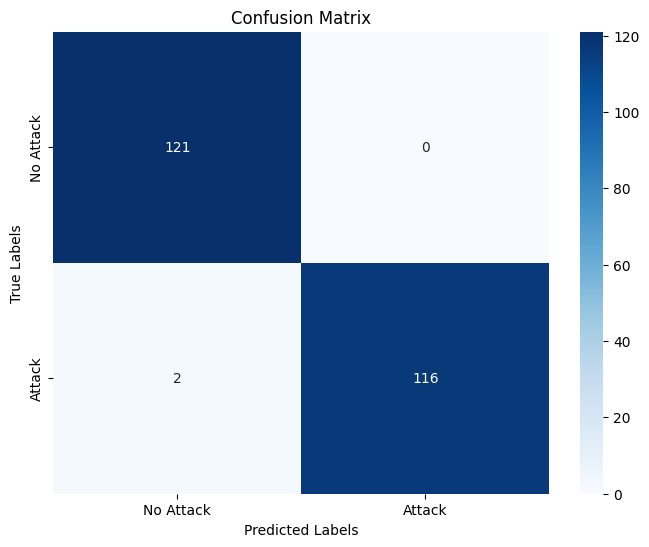

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test['attack'], predictions_rfc['attack'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

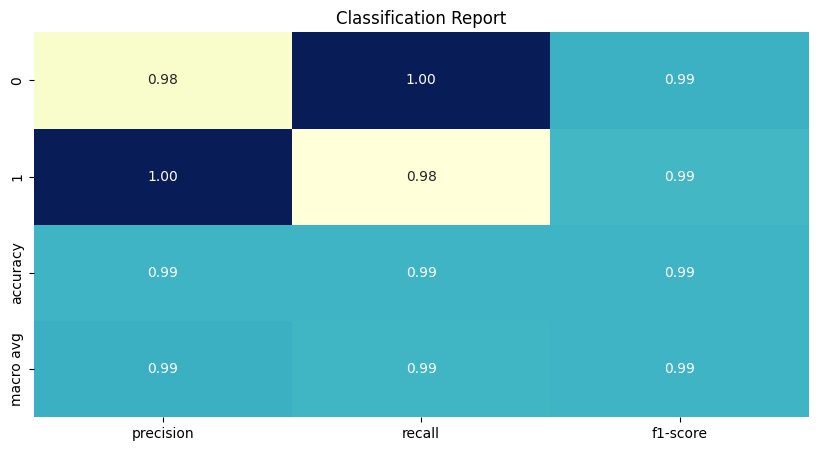

In [55]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a DataFrame
report = classification_report(y_test['attack'], predictions_rfc['attack'], output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', cbar=False, fmt='.2f')
plt.title('Classification Report')
plt.show()

In [32]:
print(confusion_matrix(y_test['category'],predictions_rfc['category']))

print(classification_report(y_test['category'],predictions_rfc['category']))

[[ 63   7   1   0]
 [ 28  17   0   0]
 [  0   0 121   0]
 [  0   1   1   0]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        71
           1       0.68      0.38      0.49        45
           2       0.98      1.00      0.99       121
           3       0.00      0.00      0.00         2

    accuracy                           0.84       239
   macro avg       0.59      0.57      0.56       239
weighted avg       0.83      0.84      0.82       239



In [33]:
print(confusion_matrix(y_test['subcategory'],predictions_rfc['subcategory']))

print(classification_report(y_test['subcategory'],predictions_rfc['subcategory']))

[[121   0   0   0]
 [  1   0   1   0]
 [  1   0  38   5]
 [  0   0   0  72]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           2       0.00      0.00      0.00         2
           3       0.97      0.86      0.92        44
           4       0.94      1.00      0.97        72

    accuracy                           0.97       239
   macro avg       0.72      0.72      0.72       239
weighted avg       0.96      0.97      0.96       239



In [34]:
rf.rfc_attack.score(X_test,y_test['attack'])

0.9916317991631799

In [35]:
rf.rfc_category.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.8410041841004184

In [36]:
rf.rfc_subcategory.score(np.concatenate((X_test,np.array(predictions_rfc['attack']).reshape(-1,1),

                                    np.array(predictions_rfc['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9665271966527197

**Naive Bayes**

In [37]:
nb = NaiveBayes()

nb.fit(X_train,y_train)



predictions_nb = nb.predict(X_test)

In [38]:
print(confusion_matrix(y_test['attack'],predictions_nb['attack']))

print(classification_report(y_test['attack'],predictions_nb['attack']))

[[119   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.98      0.99      0.99       118

    accuracy                           0.99       239
   macro avg       0.99      0.99      0.99       239
weighted avg       0.99      0.99      0.99       239



In [39]:
print(confusion_matrix(y_test['category'],predictions_nb['category']))

print(classification_report(y_test['category'],predictions_nb['category']))

[[ 69   1   0   1]
 [ 33  12   0   0]
 [  0   2 119   0]
 [  0   0   1   1]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        71
           1       0.80      0.27      0.40        45
           2       0.99      0.98      0.99       121
           3       0.50      0.50      0.50         2

    accuracy                           0.84       239
   macro avg       0.74      0.68      0.67       239
weighted avg       0.86      0.84      0.82       239



In [40]:
print(confusion_matrix(y_test['subcategory'],predictions_nb['subcategory']))

print(classification_report(y_test['subcategory'],predictions_nb['subcategory']))

[[119   0   2   0]
 [  1   1   0   0]
 [  0   1  43   0]
 [  0   0   0  72]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           2       0.50      0.50      0.50         2
           3       0.96      0.98      0.97        44
           4       1.00      1.00      1.00        72

    accuracy                           0.98       239
   macro avg       0.86      0.87      0.86       239
weighted avg       0.98      0.98      0.98       239



**Decision Tree (Information Gain)**

In [41]:
dtree_ig = DecisionTree('entropy')

dtree_ig.fit(X_train,y_train)

predictions_dtree_ig = dtree_ig.predict(X_test)

In [42]:
print(confusion_matrix(y_test['attack'],predictions_dtree_ig['attack']))

print(classification_report(y_test['attack'],predictions_dtree_ig['attack']))

[[121   0]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      0.98      0.99       118

    accuracy                           0.99       239
   macro avg       0.99      0.99      0.99       239
weighted avg       0.99      0.99      0.99       239



In [43]:
print(confusion_matrix(y_test['category'],predictions_dtree_ig['category']))

print(classification_report(y_test['category'],predictions_dtree_ig['category']))

[[ 61   8   1   1]
 [  8  37   0   0]
 [  0   0 121   0]
 [  0   1   1   0]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        71
           1       0.80      0.82      0.81        45
           2       0.98      1.00      0.99       121
           3       0.00      0.00      0.00         2

    accuracy                           0.92       239
   macro avg       0.67      0.67      0.67       239
weighted avg       0.91      0.92      0.91       239



In [44]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_ig['subcategory']))

print(classification_report(y_test['subcategory'],predictions_dtree_ig['subcategory']))

[[121   0   0   0]
 [  1   0   1   0]
 [  1   1  42   0]
 [  0   0   0  72]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           2       0.00      0.00      0.00         2
           3       0.98      0.95      0.97        44
           4       1.00      1.00      1.00        72

    accuracy                           0.98       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.98      0.98      0.98       239



In [45]:
dtree_ig.dtree_attack.score(X_test,y_test['attack'])

0.9916317991631799

In [46]:
dtree_ig.dtree_category.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1)),axis=1),y_test['category'])

0.9163179916317992

In [47]:
dtree_ig.dtree_subcategory.score(np.concatenate((X_test,np.array(predictions_dtree_ig['attack']).reshape(-1,1),

                                        np.array(predictions_dtree_ig['category']).reshape(-1,1)),axis=1),y_test['subcategory'])

0.9832635983263598

**Decision Tree (Gini Index)**

In [48]:
dtree_gini = DecisionTree('gini')

dtree_gini.fit(X_train,y_train)

predictions_dtree_gini = dtree_gini.predict(X_test)

In [49]:
print(confusion_matrix(y_test['attack'],predictions_dtree_gini['attack']))

print(classification_report(y_test['attack'],predictions_dtree_gini['attack']))

[[121   0]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      0.98      0.99       118

    accuracy                           0.99       239
   macro avg       0.99      0.99      0.99       239
weighted avg       0.99      0.99      0.99       239



In [50]:
print(confusion_matrix(y_test['category'],predictions_dtree_gini['category']))

print(classification_report(y_test['category'],predictions_dtree_gini['category']))

[[ 59   9   1   2]
 [  8  37   0   0]
 [  0   0 121   0]
 [  0   1   1   0]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        71
           1       0.79      0.82      0.80        45
           2       0.98      1.00      0.99       121
           3       0.00      0.00      0.00         2

    accuracy                           0.91       239
   macro avg       0.66      0.66      0.66       239
weighted avg       0.91      0.91      0.91       239



In [51]:
print(confusion_matrix(y_test['subcategory'],predictions_dtree_gini['subcategory']))

print(classification_report(y_test['subcategory'],predictions_dtree_gini['subcategory']))

[[121   0   0   0   0]
 [  0   0   0   0   0]
 [  1   0   0   1   0]
 [  1   2   0  41   0]
 [  0   0   0   0  72]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.98      0.93      0.95        44
           4       1.00      1.00      1.00        72

    accuracy                           0.98       239
   macro avg       0.59      0.59      0.59       239
weighted avg       0.98      0.98      0.98       239



# **Conclusion**


---

### **1st Model:**
- **Confusion Matrix:**  
  
  ```
  [[127   0]
   [  1 111]]
  ```
  - Class `0`: Almost perfect (1 False Negative).
  - Class `1`: Almost perfect (1 False Positive).
- **Precision:** 1.00 (Class `1`), 0.99 (Class `0`)  
- **Recall:** 1.00 (Class `0`), 0.99 (Class `1`)  
- **F1-Score:** 1.00 for both classes.  
- **Accuracy:** **1.00 (Perfect)**.

### **2nd Model:**
- **Confusion
   Matrix:**  
  ```
  [[125   2]
   [  1 111]]
  ```
  - Class `0`: Slightly worse (2 False Negatives).
  - Class `1`: Excellent (1 False Positive).  
- **Precision:** 0.99 (Class `0`), 0.98 (Class `1`)  
- **Recall:** 0.98 (Class `0`), 0.99 (Class `1`)  
- **F1-Score:** 0.99 for both classes.  
- **Accuracy:** **0.99**.

### **3rd Model:**
- **Confusion
   Matrix:**  
  ```
  [[125   2]
   [  2 110]]
  ```
  - Class `0`: Slightly worse (2 False Negatives).
  - Class `1`: Worse (2 False Positives).  
- **Precision:** 0.98 for both classes.  
- **Recall:** 0.98 for both classes.  
- **F1-Score:** 0.98 for both classes.  
- **Accuracy:** **0.98**.

---

### **Conclusion:**
- **1st Model is the best**, with perfect precision, recall, F1-score, and accuracy (1.00 across the board).  
- The **2nd Model is close**, with minor errors leading to a slight dip in accuracy (0.99).  
- The **3rd Model performs the worst**, with slighing models based on specific real-world constraints?

# Saving The Model

In [52]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [53]:
with open('random_forest_model.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

In [54]:
# Assuming your training data had 10 features
X_test = np.array([
    [0.1, 0.5, 0.3, 0.6, 0.4, 0.2, 0.7, 0.8, 0.9, 1.0],  # Replace with valid test feature values
    [0.2, 0.6, 0.4, 0.5, 0.3, 0.1, 0.8, 0.7, 1.0, 0.9]
])

# Make predictions
predictions = rf_loaded.predict(X_test)

# Output predictions
print("Predictions:", predictions)

Predictions:    attack  category  subcategory
0       1         1            4
1       1         1            3


In [68]:
import socket

def find_free_port():
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind(('127.0.0.1', 0))  # Bind to an available port
    free_port = sock.getsockname()[1]  # Get the port number
    sock.close()
    print(free_port)
    return free_port



app.run(debug=False, host='0.0.0.0', port=find_free_port())

37581
 * Serving Flask app '__main__'
 * Debug mode: off


In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load


# Define the Custom RandomForest Class
class RandomForest:
    def __init__(self, max_depth):
        self.rfc_attack = RandomForestClassifier(max_depth=max_depth)
        self.rfc_category = RandomForestClassifier(max_depth=max_depth)
        self.rfc_subcategory = RandomForestClassifier(max_depth=max_depth)

    def fit(self, X_train, y_train):
        # Train the attack classifier
        self.rfc_attack.fit(X_train, y_train['attack'])

        # Add 'attack' predictions as a feature and train the category classifier
        features_category = np.concatenate(
            (X_train, np.array(y_train['attack']).reshape(-1, 1)), axis=1
        )
        self.rfc_category.fit(features_category, y_train['category'])

        # Add 'category' predictions as a feature and train the subcategory classifier
        features_subcategory = np.concatenate(
            (features_category, np.array(y_train['category']).reshape(-1, 1)), axis=1
        )
        self.rfc_subcategory.fit(features_subcategory, y_train['subcategory'])

    def predict(self, X_test):
        # Predict attack
        predict_attack = self.rfc_attack.predict(X_test)

        # Use 'attack' predictions as a feature for category prediction
        test_category = np.concatenate((X_test, predict_attack.reshape(-1, 1)), axis=1)
        predict_category = self.rfc_category.predict(test_category)

        # Use 'category' predictions as a feature for subcategory prediction
        test_subcategory = np.concatenate(
            (test_category, predict_category.reshape(-1, 1)), axis=1
        )
        predict_subcategory = self.rfc_subcategory.predict(test_subcategory)

        # Return predictions as a DataFrame
        return pd.DataFrame(
            {
                'attack': predict_attack,
                'category': predict_category,
                'subcategory': predict_subcategory,
            }
        )


# Example Data (Replace with Actual Data)
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = pd.DataFrame({
    'attack': np.random.randint(0, 2, 100),
    'category': np.random.randint(0, 3, 100),
    'subcategory': np.random.randint(0, 4, 100),
})

# Create and Train the Model
model = RandomForest(max_depth=5)
model.fit(X_train, y_train)

# Save the Model using Pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the Model using Joblib (Optional)
dump(model, 'random_forest_model.joblib')

# Load the Model using Pickle
with open('/kaggle/input/rfmodel/scikitlearn/default/1/random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# OR Load the Model using Joblib (Optional)
# loaded_model = load('random_forest_model.joblib')

# Example Input for Prediction
X_test = np.random.rand(5, 10)  # 5 samples, 10 features

# Make Predictions
predictions = loaded_model.predict(X_test)

# Display Predictions
print(predictions)

   attack  category  subcategory
0       1         0            4
1       1         0            3
2       1         0            3
3       1         1            4
4       1         0            4
